In [1]:
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt

In [2]:
pysqldf = lambda q: sqldf(q, globals())

In [6]:
df_Sunday = pd.read_csv("data/Weekdays/Sunday.csv")

In [7]:
pysqldf("SELECT date, hour_of_day, COUNT(*) FROM df_Sunday GROUP BY date, hour_of_day")

,date,hour_of_day,COUNT(*)
0,2018-07-22,0,4938
1,2018-07-22,1,4843
2,2018-07-22,2,4824
3,2018-07-22,3,4952
4,2018-07-22,4,4978
...,...,...,...
91,2018-09-02,19,4735
92,2018-09-02,20,4871
93,2018-09-02,21,4842
94,2018-09-02,22,4834


In [8]:
#Sunday = 0
t1 = pysqldf("SELECT danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, hour_of_day, strftime('%w',date) AS weekday FROM df_Sunday")
t1.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,hour_of_day,weekday
0,0.467847,0.639944,-5.862,0.027538,0.154364,1.264423e-09,0.154329,0.498985,79.296997,259933.319092,4,0,0
1,0.410082,0.538568,-8.412,0.030150,0.004250,8.895929e-04,0.117016,0.141267,138.852005,274799.987793,4,0,0
2,0.410082,0.538568,-8.412,0.030150,0.004250,8.895929e-04,0.117016,0.141267,138.852005,274799.987793,4,0,0
3,0.618844,0.876492,-3.347,0.043824,0.242619,1.147450e-08,0.075242,0.777682,111.847000,149773.330688,4,0,0
4,0.505502,0.902566,-4.213,0.043006,0.000201,2.542746e-03,0.336848,0.751198,98.622002,212306.671143,4,0,0


In [9]:
t2 = pysqldf("SELECT weekday, hour_of_day, AVG(danceability) AS danceability, AVG(energy) AS energy, AVG(loudness) AS loudness, AVG(speechiness) AS speechiness, AVG(acousticness) AS acousticness, AVG(instrumentalness) AS instrumentalness, AVG(liveness) AS liveness, AVG(valence) AS valence, AVG(tempo) AS tempo FROM t1 GROUP BY weekday, hour_of_day ORDER BY weekday ASC, hour_of_day ASC;")
t2.head()

,weekday,hour_of_day,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,0,0.664368,0.626094,-7.149152,0.145014,0.230500,0.041817,0.188752,0.460494,123.461612
1,0,1,0.666470,0.620888,-7.180589,0.148392,0.229076,0.043185,0.189798,0.456859,122.736323
2,0,2,0.664626,0.623276,-7.211339,0.150243,0.228829,0.043593,0.192090,0.456023,122.696966
3,0,3,0.661810,0.622582,-7.252428,0.149374,0.231914,0.046556,0.190233,0.456312,122.770022
4,0,4,0.656575,0.624783,-7.438859,0.149412,0.230828,0.049398,0.192623,0.458586,122.335432


<AxesSubplot:xlabel='hour_of_day'>

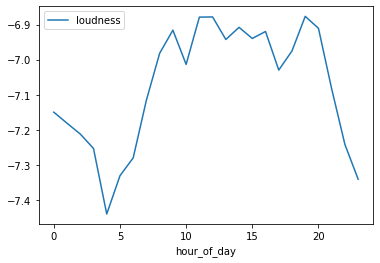

In [13]:
test = pysqldf("SELECT hour_of_day, AVG(loudness) AS loudness FROM t1 GROUP BY hour_of_day")
test.plot(x="hour_of_day", y="loudness")